#### REDI ML: PROJECT ONE
##### Part One: "Project-based North American pumpkin prices (Visualize and clean data in preparation for ML)"

So if you have ever lived in the North America, you know Pumpkins are a big deal, especially during autumn. From pumpkins pie, to pumpkins soups to pumpkins spice latte. 

In [ ]:
from IPython.display import display
from PIL import Image

img = Image.open("pumpkins.jpg")
display(img)

In [ ]:
import pandas as pd
import os 

cwd = os.getcwd()
print(cwd)

In [ ]:
# to get data from Github
# url = "https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/US-pumpkins.csv"
# download = requests.get(url).content

In [ ]:
pumpkins = pd.read_csv("C:/Users/Mercy Akinloye/Desktop/CODE/Jupyter/RediML_P1/ML-For-Beginners/2-Regression/data/US-pumpkins.csv", encoding = 'utf-8')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


#### DATA PREPARATION

In [ ]:
# check for missing data
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

<AxesSubplot: >

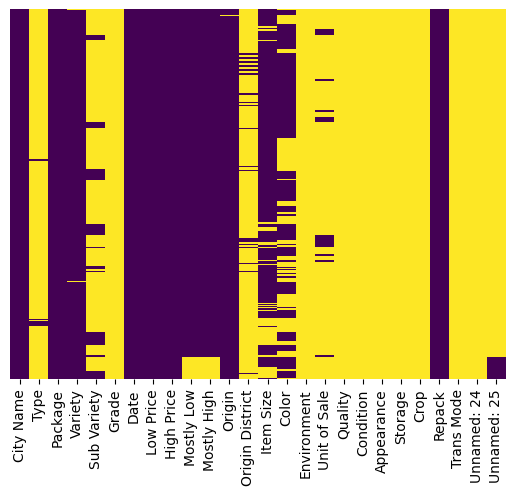

In [ ]:
# figure for data visualization
import seaborn as sns

sns.heatmap(pumpkins.isnull(), yticklabels=False, cbar=False, cmap='viridis') # yellow = null values

##### DATA PREPROCESSING I

Dataframe: 
- will subset pumpkins dataset to contain the following columns: Month, DayofYear, Variety, City, Package, Low_Price, High_Price & Average 

Tasks:
- Modify 'Date' column and create a 'Month' & 'DayofYear' columns 
- Filter 'Package' to include just bushels
- Calculate average price ('Average_Price) from 'Low_Price' & 'High_Price'
- Subset the dataframe (new_pumpkins) to contain only the following relevant columns: 
    - Month, DayOfYear, Variety, City, Package, Low_Price, High_Price, Average_Price


In [ ]:
# create new datasets rop columns
# new_columns = ['Package', 'Month', 'Day_of_Year','Low_Price', 'High_Price', 'Date']
# pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [ ]:
# get month detail from date
month = pd.DatetimeIndex(pumpkins['Date']).month
print(f"Months: {month}\n")

day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
print(f"Days of the year: {day_of_year}")

Int64Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=415)


In [ ]:
# calculate average pumpkin prices
avg_price = (pumpkins['Low_Price'] + pumpkins['High_Price']) / 2
print(avg_price)

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64


> In this analysis, we want to focus on the pumpkins package. Since pumpkins package is recorded in different units, we will filtered the dataset to focus just on the 'bushel' unit.

In [ ]:
# filter dataset so that package only contain 'bushel'

## what does regex mean
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [ ]:
#for package -> brushels is for 1 1/9 or for 1/2, need to standardize prices to be per 1 brushel

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Average Price'] = avg_price / (1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Average Price'] = avg_price / (1/2)

In [ ]:
# create new dataset
new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low_Price': pumpkins['Low Price'],
     'High_Price': pumpkins['High Price'], 
     'Average_Price': avg_price})
print(new_pumpkins)

      Month               Package  Low Price  High Price  Average Price
70        9  1 1/9 bushel cartons      15.00        15.0         15.000
71        9  1 1/9 bushel cartons      18.00        18.0         18.000
72       10  1 1/9 bushel cartons      18.00        18.0         18.000
73       10  1 1/9 bushel cartons      17.00        17.0         17.000
74       10  1 1/9 bushel cartons      15.00        15.0         15.000
...     ...                   ...        ...         ...            ...
1738      9    1/2 bushel cartons      15.00        15.0         15.000
1739      9    1/2 bushel cartons      13.75        15.0         14.375
1740      9    1/2 bushel cartons      10.75        15.0         12.875
1741      9    1/2 bushel cartons      12.00        12.0         12.000
1742      9    1/2 bushel cartons      12.00        12.0         12.000

[415 rows x 5 columns]


In [ ]:
# check for missing data - double checking never hurts
new_pumpkins.isnull().sum()

Month            0
Package          0
Low Price        0
High Price       0
Average Price    0
dtype: int64

##### VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Pumpkin Price')

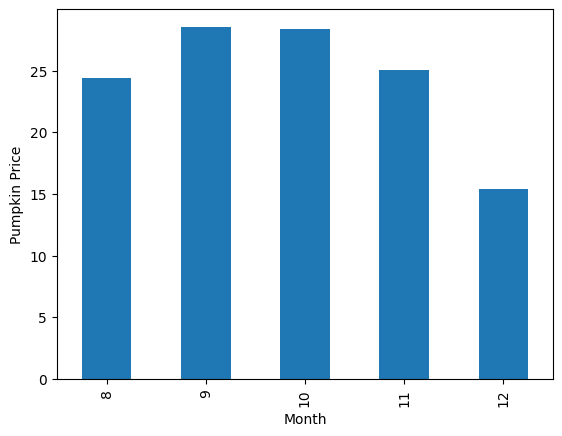

In [ ]:
# Average price of pumpkins grouped by Months 
new_pumpkins.groupby(['Month'])['Average Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [ ]:
new_pumpkins.groupby(['Month'])['Average Price'].mean().plot(kind='line')
ax.set_xticks(range(int(new_pumpkins['Month'].min()), int(new_pumpkins['Month'].max()) + 1))
plt.title("Average Pumpkin Price by Month")
plt.ylabel("Pumpkin Price")

> From the bar chart, pumpkins prices start to rise in the 8th (August) month which is the end of summer and remains high in the 9th and 10th month (September and October), and starts to drop in the 11th month (November). We clearly see the rise and fall in the prices more likely in the line graph.

#### LINEAR & POLYNOMIAL REGRESSION 


In [ ]:
df_ppumpkins = pie_pumpkins[['DayOfYear', 'Average Price']]
df_ppumpkins.corr(method = 'pearson')

# correlation is a -0.27, why does training a predictive model make sense?

In [ ]:
# dropping missing values before Linear Regression

pie_pumpkins.dropna(inplace=True) #meaning of output message
pie_pumpkins.info()

In [ ]:
#### Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
#reshape needed cause LR uses 2D-array as an input
#we only have one input so we need array with shape Nx1 (N = dataset size)
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Average Price']

In [ ]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

print(lin_reg)

In [ ]:
print(lin_reg.coef_)

#output = -0.02 --> price drops around 2 cents per day

In [ ]:
print(lin_reg.intercept_)

#output = 21 --> price at the beginning of the year is around 21 dollars

In [ ]:
# check accuracy and predict prices with test dataset
# MSE metrics: mean square error -->  mean of all squared differences between expected & predicted value

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

# check the math behind MSE

In [ ]:
# check coefficient of determination 

score = lin_reg.score(X_train,y_train) #review LR code
print('Model determination: ', score)

> Output: 
#0 - worst linear predictor, input data not taken into account  
#1 - best linear predictor, predicted all expected outcome

Result = 0.04 --> pretty low

In [ ]:
# plot regression line

plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

### Polynomial Regression

- price can fluctuate so relationship cannot necessarily be determined by a linear line
- Ex with pumpkin data:

In [ ]:
#PR creates curved line to better fit nonlinear data 
#DayOfYear variable is squared and introduced into the input data

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
#pipeline - first, adds polynomial features to model, then trains regression

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
#Polynomial Feature

In [ ]:
pipeline.fit(X_train,y_train)

print(pipeline)

In [ ]:
#ERROR: unless you add [1]

print(pipeline[1].coef_)

In [ ]:
print(pipeline[1].intercept_)

In [ ]:
poly_pred = pipeline.predict(X_test)

In [ ]:
#to convert categorical variable into numeric form, can use one hot encoding 
pd.get_dummies(new_pumpkins['Variety'])

In [ ]:
#train linear regression w/ one-hot encoded variety as input
#initialize X and y data correctly

X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Average Price']

In [ ]:
#combine different variables (categorical and numerical ones) to train LR and get more accurate predictions
#pd.get_dummies --> convert categorical variables into the numeric form
#.join --> combine different variables for training LR

#setting up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Average Price']

In [ ]:
#make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Setting up & training pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train, y_train)

In [ ]:
#Predict results for test data
pred = pipeline.predict(X_test)

In [ ]:
#calculate MSE and determination 
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train, y_train)
print('Model determination: ', score)

#Output: MSE = 2.5 (~9% prediction error), determination coefficient ~ 96%

In [ ]:
#### LOGISTIC REGRESSION 